##### Copyright 2018 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image Classification

##Import Packages

In [3]:
!pip install tf-nightly

     |████████████████████████████████| 455.4MB 36kB/s 
     |████████████████████████████████| 4.0MB 51.7MB/s 
     |████████████████████████████████| 4.0MB 45.1MB/s 
     |████████████████████████████████| 6.0MB 43.5MB/s 
     |████████████████████████████████| 471kB 57.3MB/s 
     |████████████████████████████████| 1.2MB 51.1MB/s 
     |████████████████████████████████| 3.9MB 51.7MB/s 
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Found existing installation: h5py 2.10.0
    Uninstalli

In [4]:
#실행에 필요한 liabrary들을 import 한다.
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## Downloading Dataset and show dataset sample


We use about 3,700 photos about flowers as dataset. Datasets have each five directories


```
flower_photo/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
```

In [5]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)#Downloads a file from a URL if it not already in the cache.
data_dir = pathlib.Path(data_dir) #Path는 시스템의 경로 플레이버의 구상 경로를 나타내는 클래스이며 data_dri라는 객체를 생성한다.

228818944/228813984 [==============================] - 1s 0us/step


After downloading ,we can use copy of dataset. There are 3,670 images


In [6]:
#data_dir로 표현되는 디렉터리에서, 주어진 상대 jpg 확장자 파일을  glob 하여, 일치하는 모든 파일을 (종류와 관계없이) 산출한 후 list로 만들어 길이를 잰다 즉 이미지의 갯수를 센다.

image_count = len(list(data_dir.glob('*/*.jpg'))) 
print(image_count)

3670


###Show dataset(ex rose)

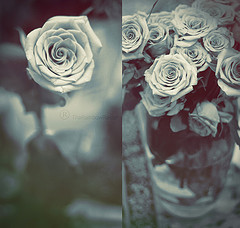

In [7]:
# roses라는 각 roses의 이미지들이 저장된 경로가 있는 리스트에서 첫번째 요소를 str로 바꾼 후 PIL library 안에 있는 Image.open 함수를 써서 이미지를 visualize 한다.
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

###Show another dataset(ex tulip)

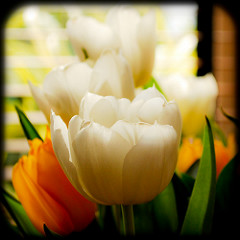

In [8]:
#위와 마찬가지로 이번에는 dataset 중에서 tulip 이미지 중 하나를 사히화한다.
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

##Load Using keras.preprocessing

Using utility, We will load these images from disks. By coding few codes image directory are loaded to 'tf.data.Dataset'


## Making Dataset

Define several hyperparameters about loader

In [9]:
batch_size = 32 #batch_size를 32로 지정하여 전체 dataset을 나누어 한 뭉치에 32장의 dataset이 있도록 한다.
img_height = 180 #image의 높이를 180으로 지정한다.
img_width = 180#image의 너비를 180으로 지정한다.

#Split the data set in to training dataset, validation dataset

In [10]:
# directory 내부의 이미지 파일들을 생성하여 tf.data.Dataset 객체형태로 반환한다. 여기서는 training dataset으로 만든다.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir, #data가 load 된 directory를 의미한다. 
  validation_split=0.2, #실수이며 0과 1사이의 값을 가지는데 0.2란 전체 dataset에서 validationset의 비율이 0.2라는 것이다.
  subset="training", #training data set임을 명시한다.
  seed=123, #seed 값을 주어 dataset을 섞는다.
  image_size=(img_height, img_width),#image 사이즈를 지정한다, 여기서는 위에서 지정한 180,180이다.
  batch_size=batch_size)# batch size를 위에서 설정한 값으로 지정한다.


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
#위와 마찬가지로 내부의 이미지 파일들을 생성하여 tf.data.Dataset 객체 형태로 반환한다 여기서는 validation dataset을 만든다.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
print(val_ds)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.
<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>


Check the dataset's class name

In [12]:
#위에서 생성한 train_ds 객체의 class_naems 클래스 변수를 출력해 class 갯수를 살펴본다.
class_names = train_ds.class_names 
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## Visualizing Dataset

show 3 validation dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


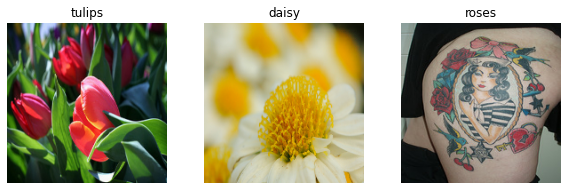

In [13]:
#show 3 train dataset
plt.figure(figsize=(10, 10)) #figure size를 4*4의 크기로 조절한다.
for images, labels in train_ds.take(3): #train_ds 객체의 take method를 사용해 method 함수의 인자로 받은 값만 큼 이미지를 생성한다.
  for i in range(3): 
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Preprocessing using Data.cahche() and Dataset.prefetch()

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)#dataset.cach()를 이용하여 epoch가 처음 동안 디스크에서 이미지를 로드한 후 이미지를 메모리에 유지한다.  
#shuffle을 사용하여 섞은 후 prefetch 함수를 사용하여 훈련 중 데이터 전처리 및 모델 실행과 겹치도록 한다.
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE) #dataset.cach()를 이용하여 epoch가 처음 동안 디스크에서 이미지를 로드한 후 이미지를 메모리에 유지한다.  

## Normalizing Dataset

RGB channel values range [0,255] which is not fit for neural network
Using Rescaling layer , make RGB channel values ranging [0,1]


In [15]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


# Making Model

Models have 3 convolutional blocks which have maxpooling layer each. The convd layer uses 'relu' activation function. Fully connected layer have 128 units


In [17]:
num_classes = 5 #class의 갯수 즉 output layer의 갯수를 5개로 지정한다. 

model = Sequential([ #layer의 목록을 Sequential 생성자에 전달하여 객체(model)을 생성한다. 
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # input_shape를 인자로 전달하고 1/255를 곱해 scaling을 한 다.
  #convolution 계산 전 후 shape가 같도록 padding을 same mode로 설정하고 activation 함수를 relu를 사용한다.filter 갯수 16 kernel size=3
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),# 2차원 Maxpooling 층을 추가해준다.
  #convolution 계산 전 후 shape가 같도록 padding을 same mode로 설정하고 activation 함수를 relu를 사용한다.filter 갯수 32 kernel size=3
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),# 2차원 Maxpooling 층을 추가해준다.
  layers.Conv2D(64, 3, padding='same', activation='relu'),#convolution 계산 전 후 shape가 같도록 padding을 same mode로 설정하고 activation 함수를 relu를 사용한다.filter 갯수 64 kernel size=3
  layers.MaxPooling2D(),# 2차원 Maxpooling 층을 추가해준다.
  layers.Flatten(), #ifcn층에서 계산을 위해 shape를 1차원으로 만들어준다.
  layers.Dense(128, activation='relu'), #outputlayer의 갯수를 128개로 한 후 activation 함수가 relu인 층을 넣어준다.
  layers.Dense(num_classes)#outputlayer의 갯수를 class 갯수인 num_class=5인 층을 넣어준다.
])


## Compiling Model

In [18]:
#model의 method compile을 호출하는데 이때 optimizer과 loss 그리고 metric을 인자로 전달한다.
model.compile(optimizer='adam',  #adam optimizer를 사용한다. 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss function으로 SparseCategoricalCrossentropy 함수를 설정한다.
              metrics=['accuracy']) #모델의 성능을 보기 위해 accuracy 모드를 저장하도록 한다.

##Model Summary

In [19]:
model.summary() #위에서 정의한 model의 내용을 살펴보게 해주는 summary 함수를 호출한다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [20]:
epochs=10 #epoch를 10번으로 설정한다. 또한 fit 함수에 train_ds, val_ds, epoch를 전달하여 모델을 훈련시킨다.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 79s 852ms/step - loss: 1.5187 - accuracy: 0.3671 - val_loss: 1.0914 - val_accuracy: 0.5450
Epoch 2/10
92/92 [==============================] - 77s 832ms/step - loss: 1.0676 - accuracy: 0.5782 - val_loss: 0.9528 - val_accuracy: 0.6267
Epoch 3/10
92/92 [==============================] - 77s 834ms/step - loss: 0.8040 - accuracy: 0.7024 - val_loss: 0.8618 - val_accuracy: 0.6744
Epoch 4/10
92/92 [==============================] - 77s 833ms/step - loss: 0.6177 - accuracy: 0.7693 - val_loss: 0.9376 - val_accuracy: 0.6798
Epoch 5/10
92/92 [==============================] - 77s 838ms/step - loss: 0.4065 - accuracy: 0.8595 - val_loss: 1.0353 - val_accuracy: 0.6921
Epoch 6/10
92/92 [==============================] - 76s 830ms/step - loss: 0.2367 - accuracy: 0.9276 - val_loss: 1.1819 - val_accuracy: 0.6621
Epoch 7/10
92/92 [==============================] - 76s 829ms/step - loss: 0.1404 - accuracy: 0.9579 - val_loss: 1.4662 - val_accuracy: 0.6390

## Visualizing the result

Compute and plot loss of train and validation set 


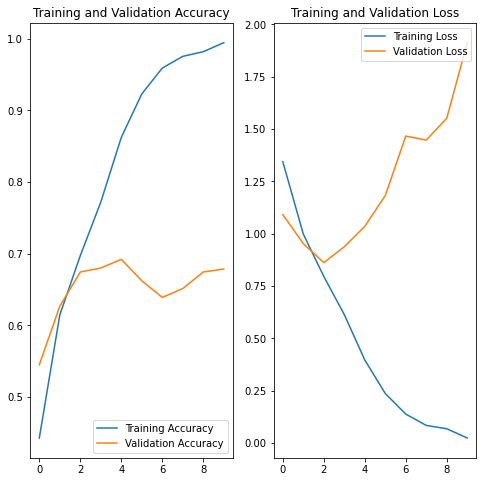

In [21]:
acc = history.history['accuracy'] #model을 훈련시키면서 얻은 accuracy를 acc에 저장한다.
val_acc = history.history['val_accuracy']##model을 훈련시키면서 얻은 validation set에 대한 accuracy를 val_ acc에 저장한다.

loss=history.history['loss'] 
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8)) #training dataset에 대한 정확도와 validation set에 대한 정확도를 가시화 한다.
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2) #validation dataset에 대한 정확도와 validation set에 대한 정확도를 가시화 한다.
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Data Augmnetation

In [22]:
# Keras preprocessing layer이용해 data augmnetation을 시행해서 data_augmentation 변수에 넣는다
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",  # mode는 "horizontal"로 설정하여 수평방향으로 뒤집고, image shape를 넣어준다.
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1), # image를 회전한다
    layers.experimental.preprocessing.RandomZoom(0.1), #image를 확대한다. 
  ]
)

Visualize images applied augmentation


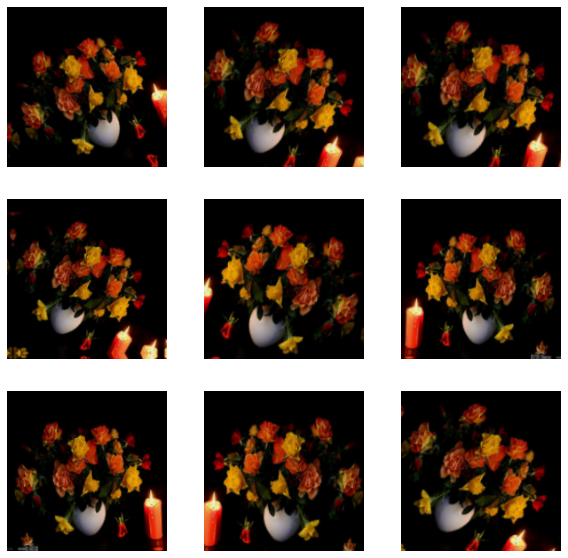

In [23]:
#data_augmentation 객체를 전달하여 가시화한다. 
plt.figure(figsize=(10, 10)) 
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


## Dropout

Use `layers.Dropout` and make new model then use data augmentation and train


In [24]:
model = Sequential([ #초반에 model을 정의했던 것과 다르게 중간에 layer.Dropout 모듈을 넣는다.
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), #Dropout 메쏘드에 0.2를 전달하여 한 layer의 unit의 20%는 없는 걸로 생각하게 한다. 
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile and train model

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [27]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
92/92 [==============================] - 88s 945ms/step - loss: 1.6685 - accuracy: 0.3085 - val_loss: 1.3173 - val_accuracy: 0.4755
Epoch 2/20
92/92 [==============================] - 88s 963ms/step - loss: 1.1343 - accuracy: 0.5305 - val_loss: 1.0616 - val_accuracy: 0.5654
Epoch 3/20
92/92 [==============================] - 90s 981ms/step - loss: 1.0146 - accuracy: 0.6110 - val_loss: 1.1022 - val_accuracy: 0.5627
Epoch 4/20
92/92 [==============================] - 88s 960ms/step - loss: 0.9559 - accuracy: 0.6144 - val_loss: 0.9240 - val_accuracy: 0.6417
Epoch 5/20
92/92 [==============================] - 90s 979ms/step - loss: 0.8549 - accuracy: 0.6775 - val_loss: 0.8310 - val_accuracy: 0.6689
Epoch 6/20
92/92 [==============================] - 91s 984ms/step - loss: 0.7887 - accuracy: 0.7043 - val_loss: 0.9922 - val_accuracy: 0.6403
Epoch 7/20
92/92 [==============================] - 89s 971ms/step - loss: 0.7829 - accuracy: 0.6961 - val_loss: 0.7449 - val_accuracy: 0.7044

## Visualize the output of training
After applyng data augmentation and dropout, overfitting decreases than before.
Train and Validation set accuracy get closer  


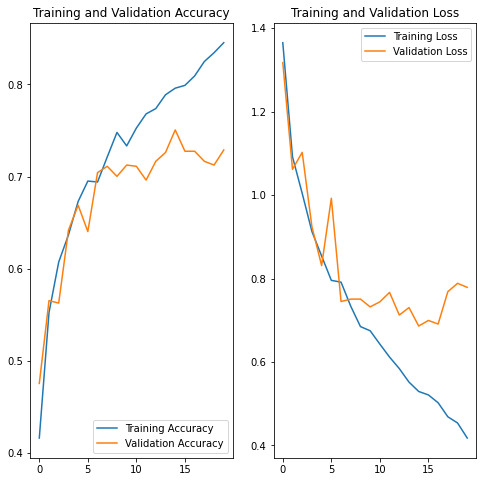

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Test on new dataset


Finally, We will use new dataset which is not included trainset nor validation set by using model

Data Augmentation and Drop out are turned off when inference the dataset


This image most likely belongs to sunflowers with a 99.95 percent confidence.


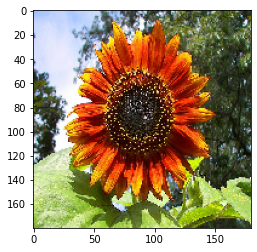

In [31]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)